## ARPU

Сначала исследуем средний доход по всем пользователям. По таблице выше мы уже знаем что в контрольной группе он на 5% выше, чем в тестовой. Нам нужно посчитать оправдывает ли эта разница себя. Выдвигаем гипотезы: Н0 - разница в средних значениях в обоих группах отсутствует (при p > 0.05) Н1 - разница есть (при p < 0.05)

Для подсчета применяем бутстрап:

In [16]:
def get_bootstrap(
    data_column_1, 
    data_column_2,
    boot_it = 1000, 
    statistic = np.mean, 
    bootstrap_conf_level = 0.95 
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): 
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True 
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) 
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = ss.norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = ss.norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
 
    plt.hist(pd_boot_data[0], bins = 50)
    
    plt.style.use('ggplot')
    plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "ci": ci, 
            "p_value": p_value}

  0%|          | 0/1000 [00:00<?, ?it/s]

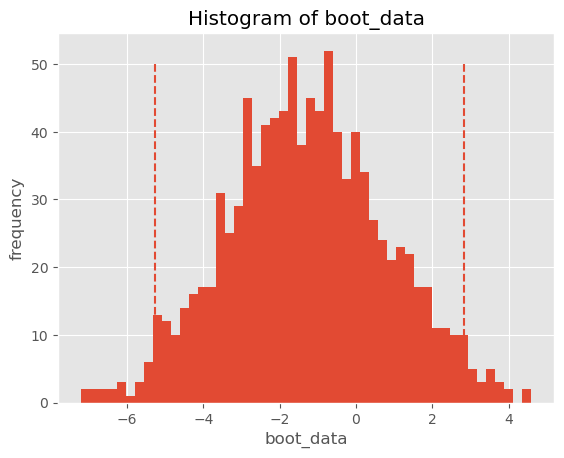

0.5358429055132431

In [18]:
bootstrap_mean_results = get_bootstrap(df_a.revenue, df_b.revenue)
bootstrap_mean_results['p_value']

In [19]:
bootstrap_mean_results['ci']

,0
0.025,-5.265667
0.975,2.843972


p > 0.05 и 0 лежит в доверительном интервале. Поэтому мы не исключаем нулевую гипотезу о том, что разница в средних значениях в обеих группах отсутствует